# Trabajo práctico integrador Análisis de datos

## Integrantes
* Davico, Cristian
* Denardi, Fabricio
* Speri, Sofía

# Explicación de las columnas y del problema

**Contexto y Motivación**
En el mercado inmobiliario, la precisión en la estimación del valor de las propiedades es crucial tanto para compradores como para vendedores. Una valoración precisa puede influir significativamente en las decisiones de inversión, financiamiento y transacción. Con el auge del big data y las técnicas de data science, es posible aprovechar grandes volúmenes de datos para desarrollar modelos predictivos que ayuden a estimar el valor de las propiedades con mayor precisión.

**Composición del Dataset:**
- **id:** Id de base de datos del registro
- **name:** Nombre de la publicación
- **operation_type:** Tipo de operación que se esta realizando con la propiedad
- **operation_currency:** Moneda de la operación
- **operation_amount:** Monto de la operación y variable objetivo del problema
- **expenses_currency:** Moneda de las expensas
- **expenses_amount:** Monto de las expensas
- **total_mts:** Total de metros de la propiedad
- **covered_mts:** Total de metros cubiertos de la propiedad
- **rooms:** Cantidad de ambientes
- **bedrooms:** Cantidad de dormitorios
- **bathrooms:** Cantidad de baños
- **garages:** Cantidad de garages
- **antique:** Antiguedad de la propiedad
- **building_layout:** Disposición del edificio
- **orientation:** Orientación de la propiedad
- **number_of_floors:** Cantidad de pisos del edificio
- **apartments_per_floor:** Departamentos por cada piso
- **real_estate_type:** Tipo de propiedad
- **posting_type:** Tipo de publicación
- **publisher_id:** Id de base de datos del publicador
- **publisher_name:** Nombre del publicador
- **address:** Dirección de la propiedad
- **city_id:** Id de base de datos del barrio/localidad de la propiedad
- **city:** Nombre del barrio de la propiedad
- **state_id:** Id de base de datos de la provincia de la propiedad
- **state:** Nombre de la provincia de la propiedad
- **country_id:** Id de base de datos del país de la propiedad
- **country:** Nombre del país de la propiedad
- **latitude:** Ubicación en latitud de la propiedad
- **longitude:** Ubicación en longitud de la propiedad
- **reserved:** Tiene reserva?
- **publication_antiquity:** Antiguedad de la publicación
- **url:** Dirección web de la publicación

**Objetivo del Proyecto**
El objetivo principal es construir un modelo predictivo que, utilizando las características mencionadas, pueda estimar con precisión el valor de una propiedad. Para lograr esto, se seguirán los siguientes pasos:

* Análisis Exploratorio de Datos (EDA): Explorar y entender la distribución y las relaciones entre las variables.
* Preprocesamiento de Datos: Limpiar y preparar los datos para el modelado, incluyendo el manejo de valores faltantes y la normalización de variables.
* Selección de Características: Determinar las variables más importantes para la predicción.
* Construcción y Evaluación de Modelos: Probar diferentes algoritmos de machine learning para encontrar el modelo que mejor se ajuste a los datos.
* Validación y Optimización: Validar el modelo utilizando técnicas como la validación cruzada y optimizar los hiperparámetros para mejorar la precisión.

#Importación de Librerias

In [ ]:
!pip install xgboost

import numpy as np
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

pd.set_option('display.max_columns', None)
pd.options.display.width=None
pd.options.display.float_format = '{:,.2f}'.format

# Lectura del Dataset

In [ ]:
df = pd.read_excel("/content/Listings.xlsx")
df.sample(5)

,id,name,operation_type,operation_currency,operation_amount,expenses_currency,expenses_amount,total_mts,covered_mts,rooms,bedrooms,bathrooms,garages,antique,building_layout,orientation,number_of_floors,apartments_per_floor,real_estate_type,posting_type,publisher_id,publisher_name,address,city_id,city,state_id,state,country_id,country,latitude,longitude,reserved,publication_antiquity,url
2926,51528876,Oficina en Colegiales - 700 m&sup2;,Venta,USD,"1,300,000.00",ARS,"850,000.00",700.00,450.00,NaN,NaN,8.00,2.00,20,NaN,NaN,NaN,NaN,Oficina comercial,PROPERTY,17020690,OCAMPO PROPIEDADES,Av Alvarez Thomas al 100,V1-C-1003678,Colegiales,V1-B-6,Capital Federal,V1-A-1,Argentina,-34.58,-58.45,False,Publicado hace más de 1 año,https://www.zonaprop.com.ar/propiedades/clasif...
8068,52990805,Departamento - Caballito 4 Ambientes,Venta,USD,"680,000.00",ARS,0.00,178.00,163.00,5.00,4.00,3.00,2.00,5,Frente,N,NaN,NaN,Apartamento,PROPERTY,17254357,SITUAR,Av. Pedro Goyena al 600,V1-C-1003693,Caballito,V1-B-6,Capital Federal,V1-A-1,Argentina,-34.63,-58.44,False,Publicado hace 110 días,https://www.zonaprop.com.ar/propiedades/clasif...
1749,50433902,Oppel | Departamento en Venta | Belgrano Capit...,Venta,USD,"179,000.00",ARS,"101,500.00",91.00,91.00,4.00,2.00,3.00,NaN,35,Frente,NaN,NaN,NaN,Apartamento,PROPERTY,17052600,OPPEL,ZABALA 2400. Entre Esquina av. cabildo,V1-C-1003652,Belgrano,V1-B-6,Capital Federal,V1-A-1,Argentina,-34.57,-58.45,False,Publicado hace más de 1 año,https://www.zonaprop.com.ar/propiedades/clasif...
5986,52592574,"Venta Lote/terreno, Vendibles 1350 m&sup2; Alm...",Venta,USD,"500,000.00",NaN,NaN,225.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Terrenos,PROPERTY,17097327,Re/Max Time,Maza 100,V1-C-1003667,Almagro,V1-B-6,Capital Federal,V1-A-1,Argentina,-34.61,-58.42,False,Publicado hace 194 días,https://www.zonaprop.com.ar/propiedades/clasif...
3023,51563277,Venta Local - Paternal,Venta,USD,"160,000.00",ARS,0.00,68.00,NaN,NaN,NaN,1.00,NaN,70,NaN,NaN,NaN,NaN,Local Comercial,PROPERTY,17041694,D'Antonio Propiedades,San Blas al 1600,V1-C-1003670,La Paternal,V1-B-6,Capital Federal,V1-A-1,Argentina,-34.60,-58.46,False,Publicado hace más de 1 año,https://www.zonaprop.com.ar/propiedades/clasif...


# Limpieza de Datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16945 entries, 0 to 16944
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16945 non-null  int64  
 1   name                   16945 non-null  object 
 2   operation_type         16945 non-null  object 
 3   operation_currency     16912 non-null  object 
 4   operation_amount       16912 non-null  float64
 5   expenses_currency      14182 non-null  object 
 6   expenses_amount        14182 non-null  float64
 7   total_mts              16878 non-null  float64
 8   covered_mts            15883 non-null  float64
 9   rooms                  15304 non-null  float64
 10  bedrooms               13421 non-null  float64
 11  bathrooms              15470 non-null  float64
 12  garages                5066 non-null   float64
 13  antique                15461 non-null  object 
 14  building_layout        10121 non-null  object 
 15  or

## Eliminación de columnas

### Eliminación por imposibilidad de estimar

Existen algunas columnas en nuestro conjunto de datos que contienen una cantidad muy limitada de información, lo cual dificulta la imputación objetiva de valores faltantes. Después de evaluar estas columnas, hemos decidido eliminarlas del análisis. Las columnas que se eliminarán son:

* number_of_floors: Cantidad de pisos del edificio.
* apartments_per_floor: Departamentos por cada piso.

In [ ]:
df.drop(columns=['number_of_floors','apartments_per_floor'], inplace=True)

In [ ]:
df.head(1)

,id,name,operation_type,operation_currency,operation_amount,expenses_currency,expenses_amount,total_mts,covered_mts,rooms,bedrooms,bathrooms,garages,antique,building_layout,orientation,real_estate_type,posting_type,publisher_id,publisher_name,address,city_id,city,state_id,state,country_id,country,latitude,longitude,reserved,publication_antiquity,url
0,20374238,Excelente 3 Ambientes - Vista Plena a Plaza - ...,Venta,USD,"158,000.00",ARS,"40,000.00",55.00,55.00,3.00,2.00,1.00,NaN,50,Frente,NE,Apartamento,PROPERTY,17049913,Sanchez Naon,Mendoza 2628,V1-C-1003652,Belgrano,V1-B-6,Capital Federal,V1-A-1,Argentina,-34.56,-58.46,False,Publicado hace más de 1 año,https://www.zonaprop.com.ar/propiedades/clasif...


### Eliminacion por no aportar al análisis

In [ ]:
df.drop(columns=['url','publisher_id','city_id','state_id','country_id','publisher_name','name','address'], inplace=True)

## Eliminación de valores no analizables

Para este análisis nos centraremos únicamente en las propiedades en venta del tipo "Apartamento", "PH" o "Casa".


In [ ]:
df = df[df['real_estate_type'].isin(['Apartamento','PH','Casa'])]

## Eliminacion de valores de operation_amount (target) en 0

In [ ]:
df = df[df['operation_amount'] != 0]

## Estimación de valores

### Reemplazar por cero u otro valor

Existen valores que podemos reemplazar por 0, ya que su ausencia puede interpretarse como la no existencia de esos elementos. En particular, dado que la variable "garages" es una característica que el vendedor suele especificar, asumimos que los valores faltantes corresponden a publicaciones de propiedades sin cochera, en las cuales este dato no fue completado.


In [ ]:
df['garages'] = df['garages'].fillna(0)

En el caso de la variable "bathrooms," completaremos los valores faltantes con 1, asumiendo que todas las propiedades tienen al menos un baño como mínimo.

In [ ]:
df[df['bathrooms'].isna()].real_estate_type.value_counts()

real_estate_type
Apartamento    257
PH              39
Casa            38
Name: count, dtype: int64

In [ ]:
df['bathrooms'] = df['bathrooms'].fillna(1)

En el caso de la variable "bedrooms," seguiremos el siguiente enfoque:

- Completaremos con 0 aquellos listados donde la variable "rooms" sea igual a 1 (Monoambientes).
- Para aquellos casos que tengan los valores de "rooms" y "bathrooms" completos, realizaremos la resta entre estas variables para obtener una estimación más aproximada.
- Para el resto de los casos, dejaremos el valor en 0.

In [ ]:
df[df['bedrooms'].isna()].real_estate_type.value_counts()

real_estate_type
Apartamento    1523
PH               30
Casa             27
Name: count, dtype: int64

In [ ]:
df['bedrooms'] = np.where(df['rooms'] == 1, 0, df['bedrooms'])

condition = df['bedrooms'].isna() & df['rooms'].notna() & df['bathrooms'].notna()
df.loc[condition, 'bedrooms'] = df.loc[condition, 'rooms'] - df.loc[condition, 'bathrooms']

In [ ]:
df[df['bedrooms'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1814 entries, 23 to 16923
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1814 non-null   int64  
 1   operation_type         1814 non-null   object 
 2   operation_currency     1814 non-null   object 
 3   operation_amount       1814 non-null   float64
 4   expenses_currency      1611 non-null   object 
 5   expenses_amount        1611 non-null   float64
 6   total_mts              1813 non-null   float64
 7   covered_mts            1765 non-null   float64
 8   rooms                  1814 non-null   float64
 9   bedrooms               1814 non-null   float64
 10  bathrooms              1814 non-null   float64
 11  garages                1814 non-null   float64
 12  antique                1785 non-null   object 
 13  building_layout        1403 non-null   object 
 14  orientation            872 non-null    object 
 15  real_es

In [ ]:
df[df['bedrooms'].isna()].real_estate_type.value_counts()

real_estate_type
Apartamento    32
Casa           11
PH              4
Name: count, dtype: int64

Para los registros en los que el valor de metros cubiertos sea mayor que el de metros totales, intercambiaremos los valores de estas columnas para corregir el error.

In [ ]:
condition = df['covered_mts'] > df['total_mts']

# Intercambiar valores de A y B donde la condición se cumple
df.loc[condition, ['total_mts', 'covered_mts']] = df.loc[condition, ['covered_mts', 'total_mts']].values

Para los registros que no tengan metros cubiertos, lo completamos con la cantidad de metros totales para tener un valor aproximado

In [ ]:
condition = df['covered_mts'].isna()
df.loc[condition, 'covered_mts'] = df.loc[condition, 'total_mts']

Para la orientación, completaremos con "desconocido" aquellos registros sin valor, ya que los valores faltantes para esta variable rondan los 50% y no es un valor inferible; pero creemos que la orientación puede inferir en el valor de un inmueble.

In [ ]:
df['orientation'].fillna('desconocido', inplace=True)

En el caso de la variable "building_layout," reemplazaremos los valores faltantes con la moda del conjunto de datos.

Elegir la moda para reemplazar los valores faltantes de la variable "building_layout" se basa en la idea de que la moda representa el valor más frecuente o común en el conjunto de datos. En este caso, los valores faltantes rondan el 3% de la variable. Este enfoque es adecuado cuando se quiere preservar la distribución de la variable y no se dispone de una base objetiva para imputar otro valor.

In [ ]:
moda_building_layout = df['building_layout'].mode()[0]
df['building_layout'].fillna(moda_building_layout, inplace=True)

## Unificación de moneda

Existen registros que estan en moneda ARS ($). Estos los transformaremos a USD utilizando el TC a la fecha de las publicaciones (todas los registros se tomaron el mismo día y se asume que las expensas están actualziadas a dicha fecha) para asi unificar los análisis

In [ ]:
dolar_bna = 909.5
dolar_blue = 1220
currency_rate = (dolar_bna + dolar_blue) / 2
df['operation_amount'] = np.where(df['operation_currency'] == '$', df['operation_amount'] / currency_rate, df['operation_amount'])
df['operation_currency'] = 'USD'
df['expenses_amount'] = np.where(df['expenses_currency'] == 'ARS', df['expenses_amount'] / currency_rate, df['expenses_amount'])
df['expenses_currency'] = 'USD'

## Transformación de columnas string

La columna "antique" no solo contiene registros de antigüedad en años, sino también valores como "A estrenar" o "En construcción." Para estos últimos dos casos, crearemos variables dummy y reemplazaremos sus valores por 0. Además, para aquellos registros con antigüedades mayores a 1000 años, realizaremos la resta entre 2024 y el valor de la antigüedad para obtener un valor real.

In [ ]:
df.antique.value_counts()

antique
A estrenar         3678
En construcción    1635
40                  947
50                  910
45                  456
                   ... 
1930                  1
134                   1
138                   1
1992                  1
129                   1
Name: count, Length: 124, dtype: int64

In [ ]:
# Valores específicos para los cuales queremos crear dummies
values_to_dummy = ['A estrenar', 'En construcción']

# Crear una columna temporal que contiene solo los valores específicos y None para los demás
df['temp'] = df['antique'].apply(lambda x: x if x in values_to_dummy else None)

# Generar las columnas dummies
dummies_ant = pd.get_dummies(df['temp'], prefix='antique')

df = df.join(dummies_ant)
df.drop(columns=['temp'], inplace=True)

In [ ]:
condition = df['antique'].isin({'A estrenar','En construcción'})
df.loc[condition, 'antique'] = 0
df['antique'] = df['antique'].astype('float')

In [ ]:
condition = df['antique'] > 1000
df.loc[condition, 'antique'] = 2024 - df.loc[condition, 'antique']

## Encoding de Variables

### Barrios

Realizaremos un codificado de los barrios utilizando la información proporcionada por el Gobierno de la Ciudad Autónoma de Buenos Aires. Agruparemos los barrios por comunas, lo que nos permitirá reducir la dispersión de los datos y balancear mejor el conjunto de datos. Esta estrategia ayudará a mejorar la precisión y estabilidad del modelo predictivo al disminuir la variabilidad excesiva entre los registros.

In [ ]:
ciudades = df['city'].value_counts(dropna=False)
ciudades

city
Palermo                 2222
Belgrano                1731
Caballito               1160
Recoleta                 946
Villa Urquiza            621
Núñez                    606
Villa Crespo             487
Almagro                  439
Flores                   406
Puerto Madero            349
Saavedra                 340
Colegiales               308
Villa Devoto             302
Barrio Norte             288
Villa del Parque         240
Balvanera                240
Villa Pueyrredón         175
Barracas                 170
Coghlan                  167
Retiro                   165
San Telmo                152
San Cristobal            151
Boedo                    151
Monserrat                143
Liniers                  140
Parque Chacabuco         121
Villa Luro               117
Floresta                 113
La Paternal              100
Chacarita                 90
Monte Castro              88
Mataderos                 82
Parque Patricios          74
Congreso                  74
Villa Ort

In [ ]:
#cargamos dataset comunas
df_comunas= pd.read_excel("/content/comunas.xlsx")

In [ ]:
#Armamos columna para poder agrupar barrios (campo CITY) por comunas
df['city'] = df['city'].str.upper()
df = df.merge(df_comunas, left_on='city', right_on='BARRIOS', how='left')

In [ ]:
#Transofromamos columna a STRING y todos los valores que no fueron reconocidos, se agrupan en categoria "OTRO"
df['COMUNA'].fillna('OTRO', inplace=True)
df['COMUNA'] = df['COMUNA'].astype('string').str.replace('.0', '')
df['COMUNA'].value_counts()

COMUNA
13      2645
14      2222
12      1303
2       1234
6       1182
1        952
15       801
11       660
5        604
7        527
3        489
10       380
4        280
9        259
8         76
OTRO      35
Name: count, dtype: Int64

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_array = encoder.fit_transform(df[['COMUNA']].astype(str)).astype(int)

In [ ]:
df = pd.concat([df, pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['COMUNA']))], axis=1)

### Building Layout

Para la variable "building_layout," generaremos variables dummy. Esto permitirá que cada categoría de disposición del edificio sea representada de manera binaria, facilitando así su incorporación en el modelo predictivo.

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_array = encoder.fit_transform(df[['building_layout']].astype(str)).astype(int)

In [ ]:
df = pd.concat([df, pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['building_layout']))], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13649 entries, 0 to 13648
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       13649 non-null  int64  
 1   operation_type           13649 non-null  object 
 2   operation_currency       13649 non-null  object 
 3   operation_amount         13649 non-null  float64
 4   expenses_currency        13649 non-null  object 
 5   expenses_amount          12296 non-null  float64
 6   total_mts                13641 non-null  float64
 7   covered_mts              13646 non-null  float64
 8   rooms                    13537 non-null  float64
 9   bedrooms                 13602 non-null  float64
 10  bathrooms                13649 non-null  float64
 11  garages                  13649 non-null  float64
 12  antique                  13421 non-null  float64
 13  building_layout          13649 non-null  object 
 14  orientation           

### Real_estate y Orientation

In [ ]:
df = pd.get_dummies(df, columns=['real_estate_type','orientation'], drop_first=True)

## Eliminación de Outliers

In [ ]:
df.describe()

,id,operation_amount,expenses_amount,total_mts,covered_mts,rooms,bedrooms,bathrooms,garages,antique,latitude,longitude,COMUNA_10,COMUNA_11,COMUNA_12,COMUNA_13,COMUNA_14,COMUNA_15,COMUNA_2,COMUNA_3,COMUNA_4,COMUNA_5,COMUNA_6,COMUNA_7,COMUNA_8,COMUNA_9,COMUNA_OTRO,building_layout_Frente,building_layout_Interno,building_layout_Lateral
count,"13,649.00","13,649.00","12,296.00","13,641.00","13,646.00","13,537.00","13,602.00","13,649.00","13,649.00","13,421.00","13,645.00","13,645.00","13,649.00","13,649.00","13,649.00","13,649.00","13,649.00","13,649.00","13,649.00","13,649.00","13,649.00","13,649.00","13,649.00","13,649.00","13,649.00","13,649.00","13,649.00","13,649.00","13,649.00","13,649.00"
mean,"52,508,403.17","297,809.54",64.79,114.12,96.38,3.08,1.97,1.66,0.45,21.90,-34.47,-58.33,0.03,0.05,0.10,0.19,0.16,0.06,0.09,0.04,0.02,0.04,0.09,0.04,0.01,0.02,0.00,0.73,0.02,0.03
std,"1,686,888.45","415,990.50",212.93,107.55,88.42,1.50,1.27,0.95,1.09,25.03,12.91,12.89,0.16,0.21,0.29,0.40,0.37,0.24,0.29,0.19,0.14,0.21,0.28,0.19,0.07,0.14,0.05,0.45,0.15,0.17
min,"20,374,238.00",1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,-38.42,-107.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"52,267,170.00","115,000.00",0.00,52.00,46.00,2.00,1.00,1.00,0.00,0.00,-34.61,-58.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"53,116,823.00","178,850.00",21.60,80.00,70.00,3.00,2.00,1.00,0.00,10.00,-34.59,-58.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,"53,433,373.00","320,000.00",75.14,138.00,116.00,4.00,3.00,2.00,1.00,40.00,-34.57,-58.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
max,"53,623,222.00","12,000,000.00","17,822.68","3,367.00","3,367.00",32.00,18.00,20.00,72.00,250.00,"1,470.00","1,440.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Eliminaremos aquellos outliers que distorsionan el conjunto de datos. Para ello, aplicaremos como regla general la eliminación de los registros que se encuentren por encima del percentil 0.95. Esta limpieza se llevará a cabo en las siguientes columnas:

- **operation_amount**: Monto de la operación
- **expenses_amount**: Monto de las expensas
- **total_mts**: Total de metros de la propiedad
- **covered_mts**: Total de metros cubiertos de la propiedad
- **rooms**: Cantidad de ambientes
- **bedrooms**: Cantidad de dormitorios
- **bathrooms**: Cantidad de baños
- **garages**: Cantidad de garages

Esta estrategia nos permitirá eliminar valores extremos que puedan sesgar el análisis y mejorar la precisión del modelo predictivo.

In [ ]:
# Lista de columnas que queremos filtrar
columns_to_filter = ['operation_amount', 'expenses_amount', 'total_mts', 'covered_mts', 'rooms', 'bedrooms', 'bathrooms', 'garages', 'antique']

# Calcular el percentil para cada columna en la lista
percentile = df[columns_to_filter].quantile(0.95)

# Filtrar el DataFrame para eliminar valores por encima del percentil en las columnas seleccionadas
for col in columns_to_filter:
    df = df[df[col] <= percentile[col]]

Tambien nos quedaremos con aquellos valores de operation_amount que sean mayores de $35.000,00

In [ ]:
df = df[df['operation_amount'] > 35000]

In [ ]:
df.describe()

,id,operation_amount,expenses_amount,total_mts,covered_mts,rooms,bedrooms,bathrooms,garages,antique,latitude,longitude,COMUNA_10,COMUNA_11,COMUNA_12,COMUNA_13,COMUNA_14,COMUNA_15,COMUNA_2,COMUNA_3,COMUNA_4,COMUNA_5,COMUNA_6,COMUNA_7,COMUNA_8,COMUNA_9,COMUNA_OTRO,building_layout_Frente,building_layout_Interno,building_layout_Lateral
count,"10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00","10,193.00"
mean,"52,632,119.57","203,652.58",40.37,84.82,72.10,2.74,1.70,1.43,0.30,18.34,-34.58,-58.45,0.03,0.05,0.10,0.20,0.16,0.06,0.08,0.04,0.02,0.05,0.09,0.04,0.00,0.02,0.00,0.69,0.03,0.03
std,"1,514,151.77","139,779.51",54.64,48.41,38.97,1.13,1.07,0.61,0.52,21.32,0.86,0.85,0.17,0.21,0.30,0.40,0.37,0.25,0.27,0.19,0.14,0.21,0.29,0.20,0.06,0.12,0.05,0.46,0.16,0.18
min,"20,374,238.00","36,000.00",0.00,17.00,1.00,1.00,0.00,1.00,0.00,0.00,-38.42,-107.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"52,390,705.00","108,900.00",0.00,50.00,44.00,2.00,1.00,1.00,0.00,0.00,-34.61,-58.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"53,160,877.00","159,999.00",18.78,71.00,62.00,3.00,2.00,1.00,0.00,7.00,-34.59,-58.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,"53,448,050.00","250,800.00",61.05,106.00,90.00,4.00,3.00,2.00,1.00,40.00,-34.57,-58.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
max,"53,623,222.00","890,000.00",272.36,302.00,252.00,6.00,4.00,3.00,2.00,68.00,23.63,-10.31,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10193 entries, 0 to 13648
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10193 non-null  int64  
 1   operation_type           10193 non-null  object 
 2   operation_currency       10193 non-null  object 
 3   operation_amount         10193 non-null  float64
 4   expenses_currency        10193 non-null  object 
 5   expenses_amount          10193 non-null  float64
 6   total_mts                10193 non-null  float64
 7   covered_mts              10193 non-null  float64
 8   rooms                    10193 non-null  float64
 9   bedrooms                 10193 non-null  float64
 10  bathrooms                10193 non-null  float64
 11  garages                  10193 non-null  float64
 12  antique                  10193 non-null  float64
 13  building_layout          10193 non-null  object 
 14  posting_type             10

#Análisis de Datos

##Pairplot

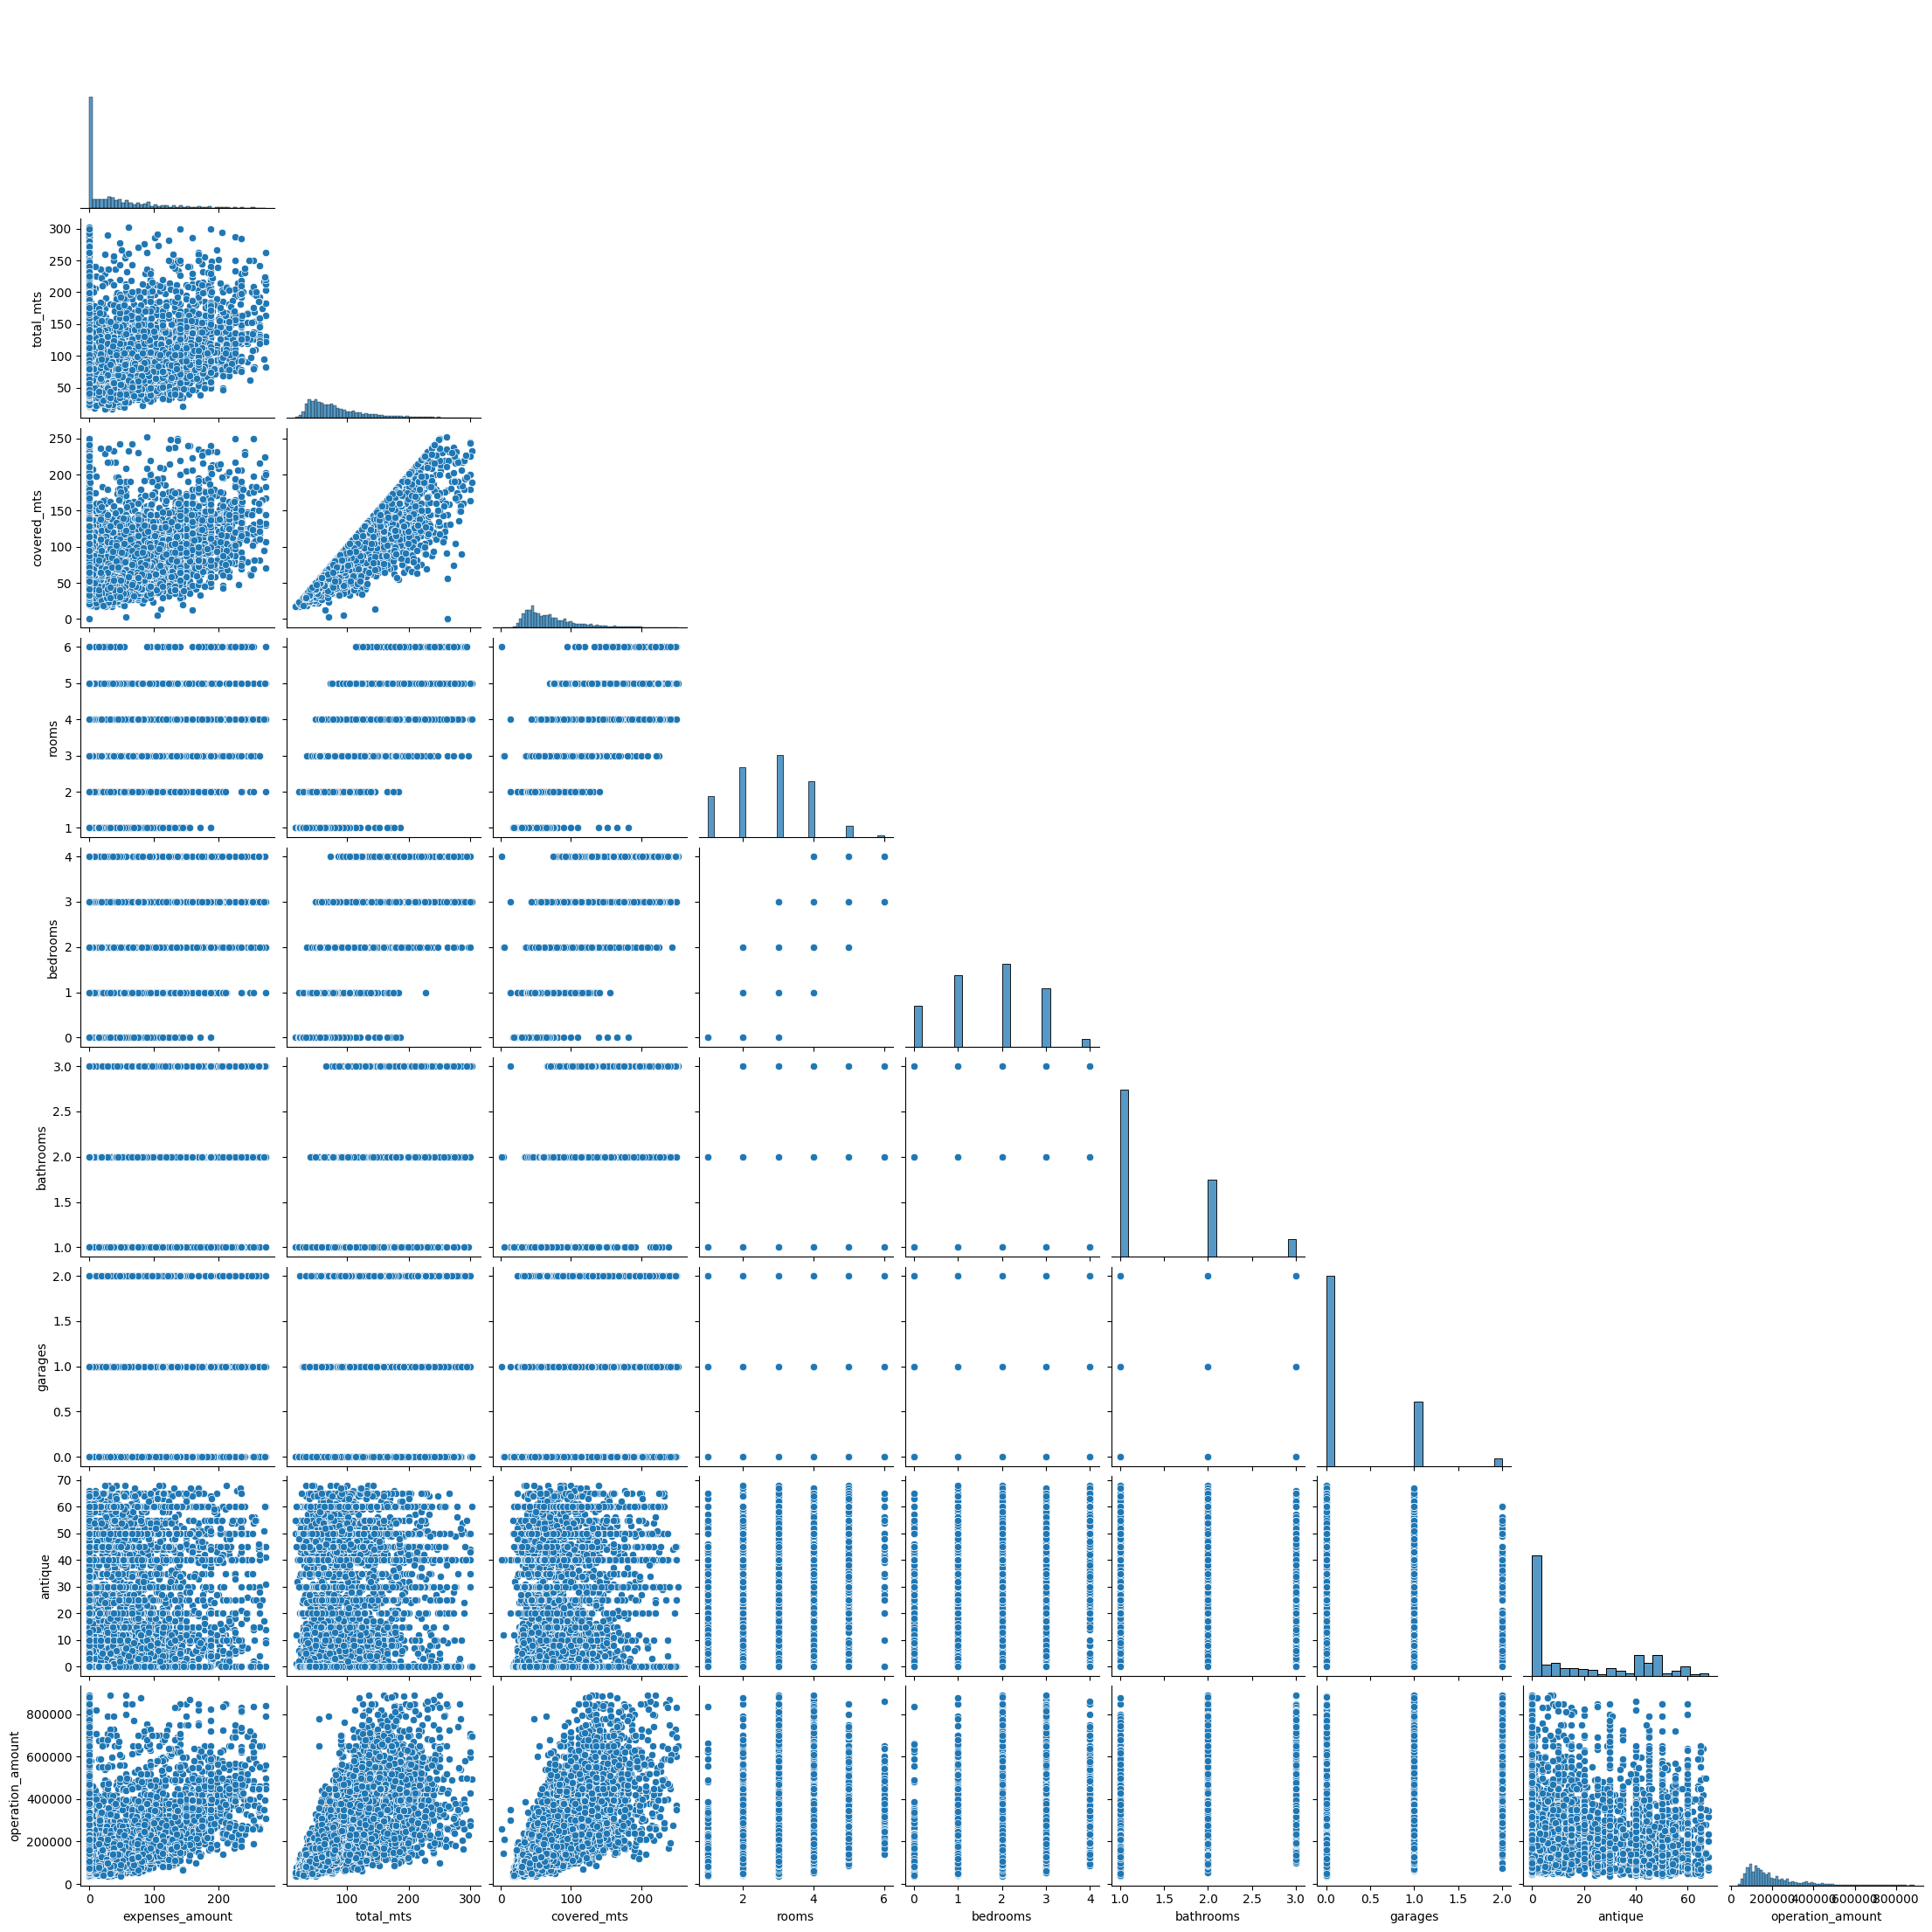

In [ ]:
filter = ['expenses_amount','total_mts','covered_mts','rooms','bedrooms','bathrooms','garages','antique','operation_amount']
sns.pairplot(df[filter], corner = True, diag_kind='hist')

**Análisis del gráfico**

**operation_amount vs total_mts y covered_mts:**
Existe una clara relación positiva entre el monto de la operación y los metros totales/cubiertos. A medida que aumenta el tamaño de la propiedad, también lo hace su valor.
La dispersión es más notoria en los valores altos, lo que sugiere que propiedades muy grandes tienen una mayor variabilidad en su precio.

**total_mts vs covered_mts:**
La relación entre metros totales y metros cubiertos es fuertemente lineal, lo cual es esperado ya que los metros cubiertos son una porción de los metros totales.

**rooms, bedrooms, bathrooms y garages:**
La cantidad de ambientes (rooms) muestra una cierta variabilidad en su relación con los metros totales y cubiertos. Propiedades con más ambientes tienden a tener más metros, aunque la relación no es perfectamente lineal.
La cantidad de dormitorios (bedrooms) y baños (bathrooms) también se incrementa con el tamaño de la propiedad, pero hay más dispersión en estos datos.
La variable garages muestra una relación menos clara, ya que muchas propiedades no tienen garaje (valor 0)

**antique:**
La antigüedad de la propiedad (antique) no muestra una relación clara con los metros o el monto de la operación. Hay una alta concentración de valores bajos, indicando que la mayoría de las propiedades son relativamente nuevas.

**Distribuciones Univariadas:**
Se puede observar que la mayoría de las propiedades tienen un número reducido de dormitorios y baños, y que hay una mayor cantidad de propiedades pequeñas en términos de metros totales y cubiertos.

<Axes: >

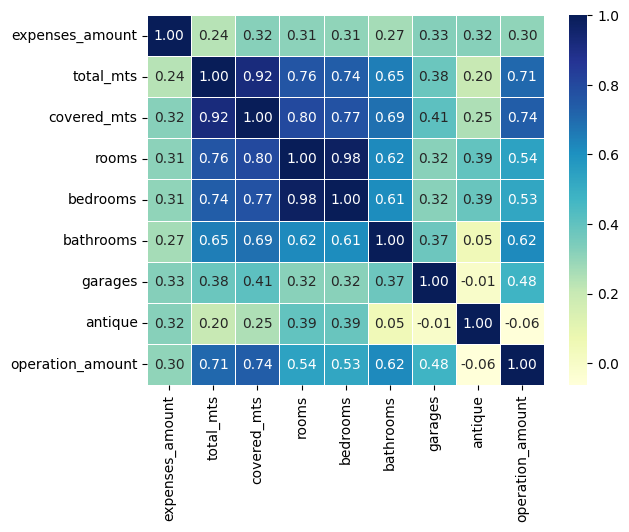

In [ ]:
df_corr = df[filter].corr()
sns.heatmap(df_corr, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)

**Análisis de la Matriz de Correlación**

**operation_amount (Monto de la Operación):**
Tiene una fuerte correlación positiva con total_mts (0.71) y covered_mts (0.74). Esto indica que a mayor tamaño total y cubierto de la propiedad, mayor es el monto de la operación.
También muestra correlaciones positivas moderadas con rooms (0.54), bedrooms (0.53), bathrooms (0.62), y garages (0.48). Estas relaciones sugieren que más ambientes, dormitorios, baños y garages tienden a aumentar el valor de la propiedad.

**total_mts y covered_mts:**
Existe una correlación extremadamente alta entre total_mts y covered_mts (0.92), lo que es lógico ya que los metros cubiertos son una parte significativa de los metros totales.
Ambas variables también están altamente correlacionadas con el número de rooms (0.76 y 0.80 respectivamente) y bedrooms (0.74 y 0.77 respectivamente), indicando que propiedades más grandes tienden a tener más ambientes y dormitorios.

**rooms y bedrooms:**
Tienen una correlación casi perfecta (0.98), lo que sugiere que el número de ambientes es a menudo muy similar al número de dormitorios en las propiedades del conjunto de datos. Esto tiene sentido ya que son pocos los casos donde un ambiente esta destinado a un "estudio", "oficina", etc

**bathrooms:**
Muestra una correlación moderada con total_mts (0.65) y covered_mts (0.69), así como con rooms (0.62) y bedrooms (0.61). Esto indica que más metros y más ambientes a menudo implican más baños.

**garages:**
Tiene correlaciones más bajas con la mayoría de las variables, pero aún muestra una relación moderada con covered_mts (0.41) y bathrooms (0.37). Esto puede sugerir que propiedades con más metros cubiertos y más baños tienden a tener más garages.

**expenses_amount (Monto de las Expensas):**
Tiene correlaciones positivas bajas a moderadas con varias variables como covered_mts (0.32) y garages (0.33). Esto sugiere que propiedades más grandes y con más garages pueden tener expensas más altas.

**Resumen**
* Las variables total_mts, covered_mts, rooms, y bedrooms son fuertemente correlacionadas entre sí y con el operation_amount, sugiriendo que estas son importantes para predecir el valor de una propiedad.
* Variables como bathrooms y garages también tienen una correlación positiva significativa con el valor de la propiedad, aunque en menor medida.
* expenses_amount y antique muestran correlaciones más débiles, indicando que su impacto en el valor de la propiedad es menor en comparación con las otras variables.

# Modelado

En una primera instancia vamos a realizar modelos de regresión para la predicción del valor del inmueble

## Eliminacion de columnas
- *building_layout, city, comuna, barrio*: se eliminan ya que fueron reemplazads con encoding
- *Operation_type, operation_currency, posting_type, city, state, country*: se eliminan porque para nuestro caso no aportan información (toman siempre un único valor)
- *Id, reserved, publication_antiquity*: se eliminan porque no son relevantes para el modelo



In [ ]:
df.drop(columns=['id','operation_type','operation_currency','expenses_currency','building_layout','posting_type','city','state','country','reserved','publication_antiquity','COMUNA','BARRIOS'], inplace=True)

In [ ]:
df.head()

,operation_amount,expenses_amount,total_mts,covered_mts,rooms,bedrooms,bathrooms,garages,antique,latitude,longitude,antique_A estrenar,antique_En construcción,COMUNA_10,COMUNA_11,COMUNA_12,COMUNA_13,COMUNA_14,COMUNA_15,COMUNA_2,COMUNA_3,COMUNA_4,COMUNA_5,COMUNA_6,COMUNA_7,COMUNA_8,COMUNA_9,COMUNA_OTRO,building_layout_Frente,building_layout_Interno,building_layout_Lateral,real_estate_type_Casa,real_estate_type_PH,orientation_N,orientation_NE,orientation_NO,orientation_O,orientation_S,orientation_SE,orientation_SO,orientation_desconocido
0,"158,000.00",37.57,55.00,55.00,3.00,2.00,1.00,0.00,50.00,-34.56,-58.46,False,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,False,False,False,True,False,False,False,False,False,False
1,"185,000.00",81.71,84.00,84.00,4.00,3.00,1.00,0.00,50.00,-34.59,-58.40,False,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,True
2,"695,000.00",83.59,140.00,140.00,4.00,3.00,3.00,1.00,10.00,-34.57,-58.42,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,False,False,True,False,False,False,False,False,False,False
3,"120,000.00",0.00,100.00,70.00,3.00,2.00,1.00,0.00,12.00,-34.64,-58.43,False,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,False,True,False,False,False,False,False,False,False,True
5,"237,000.00",0.09,136.00,136.00,4.00,3.00,3.00,0.00,0.00,-34.60,-58.45,True,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,False,True,False,False,False,True,False,False,False,False


## Regresion Lineal
En base a la correlación mostrada anteriormente, probaremos realizar una regresión lineal únicamente con la variable covered_mts

Utilizarémos este modelo como una aproximación simple y contra el cual compararémos los próximos modelos

<Axes: >

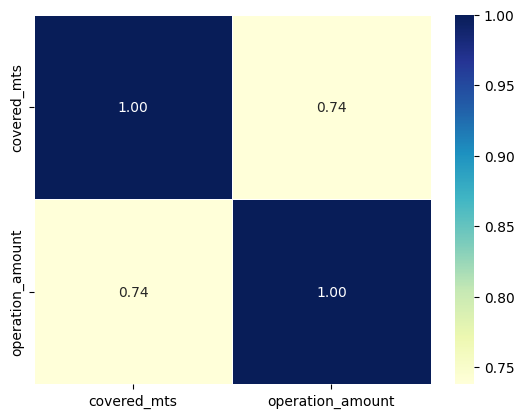

In [ ]:
corr_matrix = df[['covered_mts','operation_amount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)

###Selección de columnas

In [ ]:
df_rl = df[['covered_mts','operation_amount']]
df_rl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10193 entries, 0 to 13648
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   covered_mts       10193 non-null  float64
 1   operation_amount  10193 non-null  float64
dtypes: float64(2)
memory usage: 238.9 KB


###Generación de X e y

In [ ]:
df_rl.head()

,covered_mts,operation_amount
0,55.00,"158,000.00"
1,84.00,"185,000.00"
2,140.00,"695,000.00"
3,70.00,"120,000.00"
5,136.00,"237,000.00"


In [ ]:
X = df_rl[['covered_mts']]
y = df_rl[['operation_amount']]

###Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Modelo

In [ ]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

###Métricas

In [ ]:
# Calcular métricas de evaluación
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Desempeño en el conjunto de entrenamiento:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nDesempeño en el conjunto de prueba:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

Desempeño en el conjunto de entrenamiento:
MAE: 61889.471947912054
MSE: 8884913285.122108
RMSE: 94259.81797734446
R²: 0.5442904808549829

Desempeño en el conjunto de prueba:
MAE: 62021.256205043705
MSE: 8963701316.969952
RMSE: 94676.82565955595
R²: 0.5448585787780129


###Gráfico

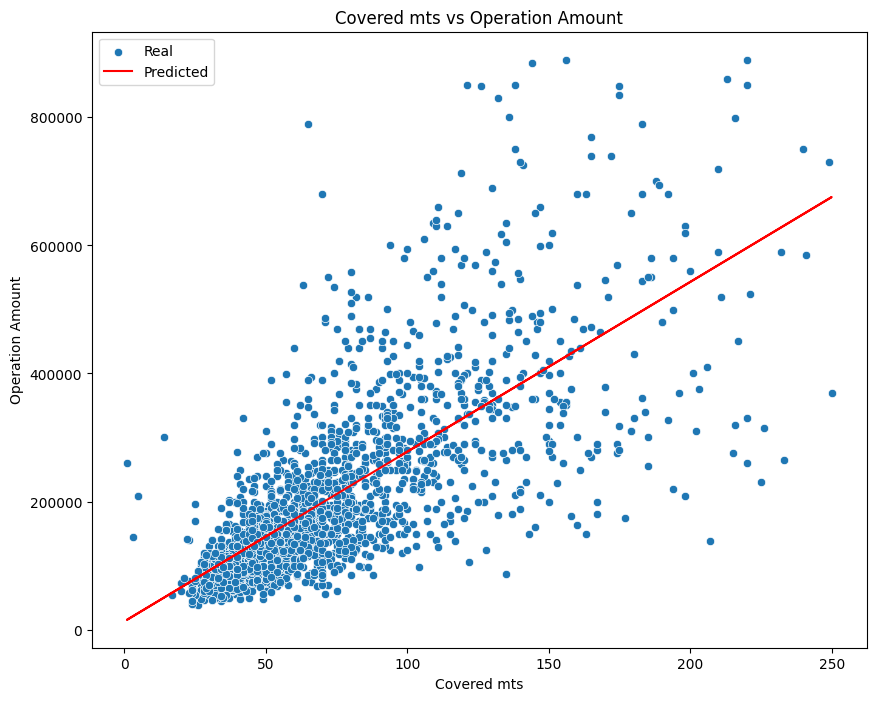

In [ ]:
y_test_lin = y_test.operation_amount.values
y_pred_lin = y_test_pred

# Crear un DataFrame para facilitar la visualización
result_df = pd.DataFrame({
    # 'Covered mts': X_test[:, 0],
    'Covered mts': X_test.covered_mts.values,
    'Real Operation Amount': y_test_lin.flatten(),
    'Predicted Operation Amount': y_pred_lin.flatten()
})

# Gráfica de dispersión de Covered mts vs Operation Amount
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Covered mts', y='Real Operation Amount', data=result_df, label='Real')
plt.plot('Covered mts', 'Predicted Operation Amount', color='red', data=result_df, label='Predicted')
plt.title('Covered mts vs Operation Amount')
plt.xlabel('Covered mts')
plt.ylabel('Operation Amount')
plt.legend()
plt.show()

## XGBoost
Vamos a optar por entrenar un modelo de boosting, en este caso XGBOOST; ya que es un modelo más potente y robusto que un solo árbol de regresión. Como tenemos muchos parámetros, vamos a hacer la comparativa del modelo por default vs el modelo con regularización por Lasso L1

### Selección de Columnas

In [ ]:
df_xgb = df.copy()

### Transformación de tipos de datos

In [ ]:
df_xgb[df_xgb.select_dtypes(['bool']).columns] = df_xgb.select_dtypes(['bool']).astype(int)
df_xgb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10193 entries, 0 to 13648
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   operation_amount         10193 non-null  float64
 1   expenses_amount          10193 non-null  float64
 2   total_mts                10193 non-null  float64
 3   covered_mts              10193 non-null  float64
 4   rooms                    10193 non-null  float64
 5   bedrooms                 10193 non-null  float64
 6   bathrooms                10193 non-null  float64
 7   garages                  10193 non-null  float64
 8   antique                  10193 non-null  float64
 9   latitude                 10193 non-null  float64
 10  longitude                10193 non-null  float64
 11  antique_A estrenar       10193 non-null  int64  
 12  antique_En construcción  10193 non-null  int64  
 13  COMUNA_10                10193 non-null  int64  
 14  COMUNA_11                10

### Generación de X e y

In [ ]:
X = df_xgb.drop(columns=['operation_amount'])
y = df_xgb['operation_amount']


### Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Escalamiento de los datos

In [ ]:
# Crear una instancia de StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Ajustar el scaler al conjunto de entrenamiento y transformar
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# Transformar el conjunto de testeo
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

### Modelo

In [ ]:
# Inicializamos XGBoost con sus hiperparámetros por defecto
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
xgb_regressor.fit(X_train_scaled, y_train_scaled)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

### Metricas

In [ ]:
# Calculamos las métricas
y_pred_xgb = xgb_regressor.predict(X_test_scaled)
y_pred_xgb_train = xgb_regressor.predict(X_train_scaled)

y_train_inversed = scaler_y.inverse_transform(y_train_scaled)
y_pred_train_inversed = scaler_y.inverse_transform(y_pred_xgb_train.reshape(-1, 1))

y_test_inversed = scaler_y.inverse_transform(y_test_scaled)
y_pred_inversed = scaler_y.inverse_transform(y_pred_xgb.reshape(-1, 1))

print("XGBOOST DEFAULT:")
print("Desempeño en el conjunto de entrenamiento:")
print(f"MAE: {mean_absolute_error(y_train_inversed, y_pred_train_inversed)}")
print(f"MSE: {mean_squared_error(y_train_inversed, y_pred_train_inversed)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train_inversed, y_pred_train_inversed))}")
print(f"R²: {r2_score(y_train_inversed, y_pred_train_inversed)}")

print("\nDesempeño en el conjunto de prueba:")
print(f"MAE: {mean_absolute_error(y_test_inversed, y_pred_inversed)}")
print(f"MSE: {mean_squared_error(y_test_inversed, y_pred_inversed)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_inversed, y_pred_inversed))}")
print(f"R²: {r2_score(y_test_inversed, y_pred_inversed)}")

XGBOOST DEFAULT:
Desempeño en el conjunto de entrenamiento:
MAE: 15477.422301362829
MSE: 481294879.4364501
RMSE: 21938.433841923405
R²: 0.9753142601355248

Desempeño en el conjunto de prueba:
MAE: 31494.634659299903
MSE: 2648572698.432071
RMSE: 51464.28565939754
R²: 0.8655159180848722


In [ ]:
from sklearn.model_selection import GridSearchCV
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_scaled)
dtest = xgb.DMatrix(X_test_scaled, label=y_test_scaled)

# Definir el modelo con los parámetros fijos
#xgb_model = xgb.XGBRegressor(objective='reg:squarederror',random_state=42,n_jobs=-1)

# Definir la búsqueda de hiperparámetros solo para alpha
alpha_values = np.linspace(0, 10, 20)
param_grid = {
    'alpha': alpha_values
}

# Realizar la búsqueda
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=0)
grid_search.fit(X_train, y_train)

# Obtener el mejor parámetro alpha
best_alpha = grid_search.best_params_['alpha']
print(f'Mejor alpha: {best_alpha}')


# Entrenar el modelo con el mejor alpha
xgb_model_alpha = xgb.XGBRegressor(objective='reg:squarederror',random_state=42,n_jobs=-1, alpha = best_alpha)
xgb_model_alpha.fit(X_train_scaled, y_train_scaled)



Mejor alpha: 5.263157894736842


XGBRegressor(alpha=5.263157894736842, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, ...)

In [ ]:
# Calculamos las métricas
y_pred_xgb_a = xgb_model_alpha.predict(X_test_scaled)
y_pred_xgb_train_a = xgb_model_alpha.predict(X_train_scaled)

y_train_inversed = scaler_y.inverse_transform(y_train_scaled)
y_pred_train_inversed_a = scaler_y.inverse_transform(y_pred_xgb_train_a.reshape(-1, 1))

y_test_inversed = scaler_y.inverse_transform(y_test_scaled)
y_pred_inversed_a = scaler_y.inverse_transform(y_pred_xgb_a.reshape(-1, 1))

print("XGBOOST CON L1:")
print("Desempeño en el conjunto de entrenamiento:")
print(f"MAE: {mean_absolute_error(y_train_inversed, y_pred_train_inversed_a)}")
print(f"MSE: {mean_squared_error(y_train_inversed, y_pred_train_inversed_a)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train_inversed, y_pred_train_inversed_a))}")
print(f"R²: {r2_score(y_train_inversed, y_pred_train_inversed)}")

print("\nDesempeño en el conjunto de prueba:")
print(f"MAE: {mean_absolute_error(y_test_inversed, y_pred_inversed_a)}")
print(f"MSE: {mean_squared_error(y_test_inversed, y_pred_inversed_a)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_inversed, y_pred_inversed_a))}")
print(f"R²: {r2_score(y_test_inversed, y_pred_inversed_a)}")

XGBOOST CON L1:
Desempeño en el conjunto de entrenamiento:
MAE: 23200.99220091366
MSE: 1180276157.9573848
RMSE: 34355.14747395774
R²: 0.9753142601355248

Desempeño en el conjunto de prueba:
MAE: 31726.328860654732
MSE: 2619987875.2255464
RMSE: 51185.817129606774
R²: 0.8669673427363124


Vemos que la peformance en este caso no varía mucho entre las dos versiones, pero vamos a continuar con el modelo regularizado; que tiene mejoras en RMSE y  R2

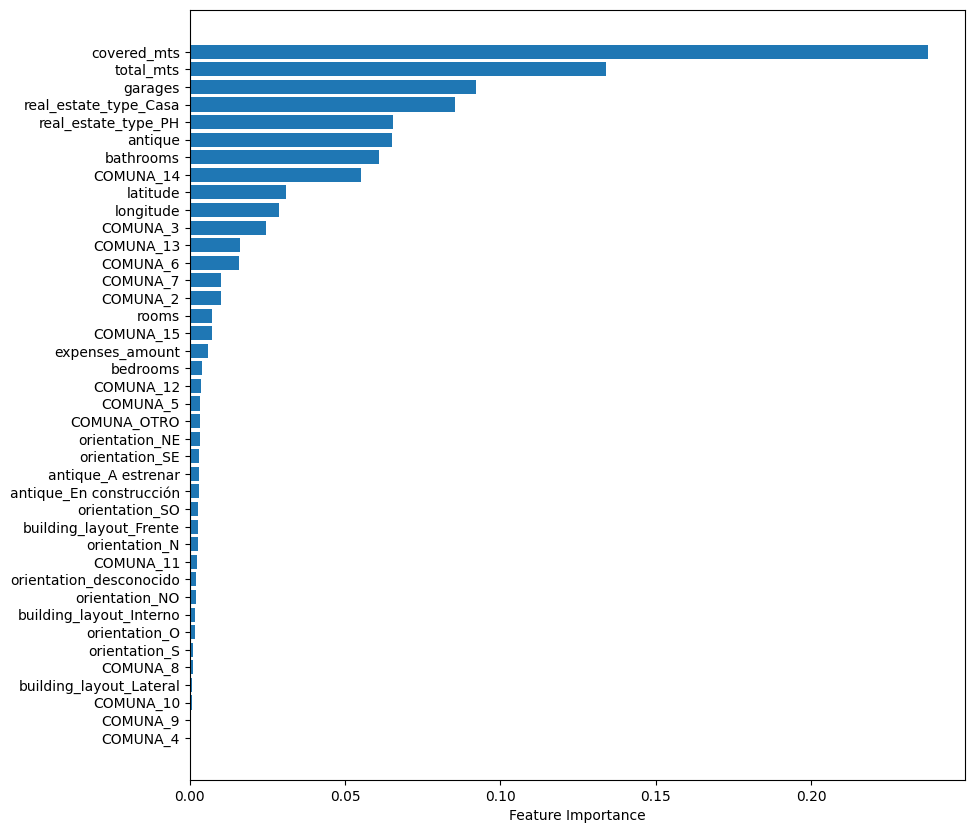

In [ ]:
# Obtenemos la importancia de características
feature_importances = xgb_model_alpha.feature_importances_
feature_names = df_xgb.drop(columns=['operation_amount']).columns  # Excluir la columna objetivo

# Ordenamos los índices
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.show()

**Observaciones Clave**

**covered_mts (Metros Cubiertos):**
Es la característica más importante en el modelo, lo que indica que tiene la mayor influencia en la predicción del precio de la propiedad. Esto es consistente con nuestras observaciones previas de que los metros cubiertos están fuertemente correlacionados con el valor de la propiedad.

**real_estate_type_Casa y real_estate_type_PH:**
Los tipos de propiedad "Casa" y "PH" (Propiedad Horizontal) también son características muy influyentes, lo que sugiere que el tipo de propiedad es un factor significativo en la determinación del precio.

**total_mts (Metros Totales):**
También es una característica importante, aunque menos que los metros cubiertos. Los metros totales proporcionan información adicional sobre el tamaño de la propiedad.

**Garage, bathrooms**
Nos sorprendió que para el modelo, bathrooms y garage estén por sobre rooms/bedrooms, pero creemos que puede deberse a que ya está implícito en los metros cuadrados, y en cambio garage y baños son características más diferenciales y buscadas por los compradores

### Gráfico

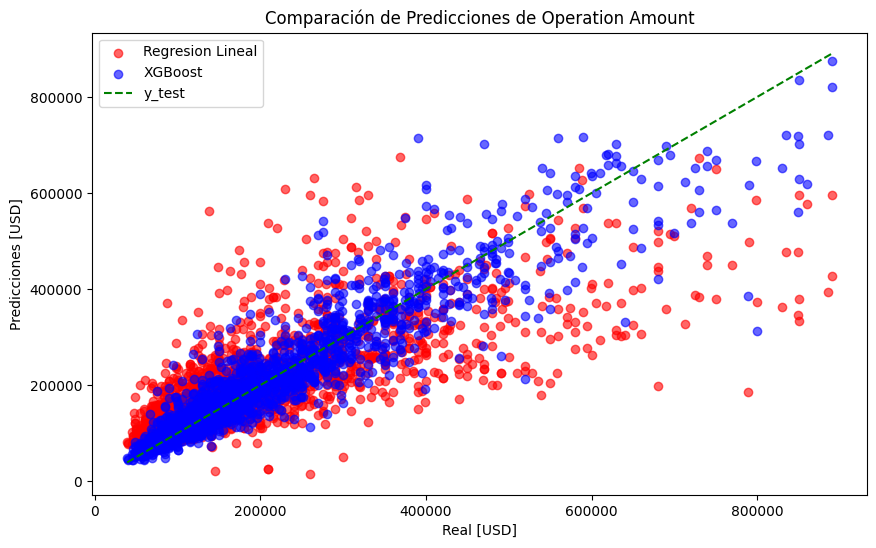

In [ ]:
plt.figure(figsize=(10, 6))

# Graficar las predicciones del modelo 1 vs y_test
plt.scatter(y_test_lin, y_pred_lin, color='red', label='Regresion Lineal', alpha=0.6)
# Graficar las predicciones del modelo 2 vs y_test
plt.scatter(y_test_inversed, y_pred_inversed, color='blue', label='XGBoost', alpha=0.6)

# Añadir una línea de referencia (y = x)
plt.plot([min(y_test_inversed), max(y_test_inversed)], [min(y_test_inversed), max(y_test_inversed)], color='green', linestyle='--', label='y_test')

# Añadir etiquetas y título
plt.xlabel('Real [USD]')
plt.ylabel('Predicciones [USD]')
plt.title('Comparación de Predicciones de Operation Amount')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

###Conclusiones

1. **Desempeño del Modelo de Regresión Lineal**:
   - El modelo de regresión lineal simple, utilizando solo **covered_mts**, mostró un desempeño moderado, con un R² de aproximadamente 0.544, indicando que más del 54% de la variabilidad en los precios de las propiedades puede ser explicada por los metros cubiertos.
   - Los errores de predicción fueron relativamente altos (MAE, MSE, RMSE), sugiriendo que aunque **covered_mts** es un predictor significativo, hay muchos otros factores que influyen en el valor de una propiedad.
   - Se hizo la prueba con Regresión Lineal de todos los parámetros, si bien las métricas fueron levente mejores que la regresión "simplificada" con **covered_mts**; nos pareció bueno dejar la comaprativa con esta versión ya que es un modelo con bajo costo computacional (un sólo parámetro). Y vemos que para el rangoo inferior de **operation_amount** no tiene un mal funcionamiento

2. **Dispersión de Datos en Metros Cubiertos**:
   - En el modelo de regresión lineal, a partir de aproximadamente los 100 metros cubiertos, la dispersión de los datos comienza a ser considerablemente mayor. Esto sugiere que las propiedades más grandes tienen una mayor variabilidad en su valor, lo cual no es capturado completamente por un modelo lineal simple.

3. **Distribución de Errores**:
   - Un RMSE significativamente mayor al MAE sugiere que los errores del modelo no están distribuidos uniformemente. En cambio, unos pocos errores grandes están influyendo en el valor del RMSE. Esto indica una varianza alta en los errores del modelo.

4. **Mejora con XGBoost**:
   - Utilizando el modelo de XGBoost y comparándolo con la regresión lineal, observamos mejoras significativas en las métricas. Por ejemplo:
     - **MAE**: La mejora fue del 50% aprox.
     - **MSE**: La mejora fue del 70% aprox.
     - **RMSE**: La mejora fue del 45% aprox.
     - **R²**: El coeficiente de determinación aumentó en 30 puntos aprox.
  - Del gráfico podemos ver que Xgboost tiene menor dispersión en las predicciones, principalmnte en el segenot inferior (entre 0 y 400.000 usd). Luego, paraa valores superiores de inmuebles, ambas predicciones se dispersan; pero vemos igualmente que XGBOOST se mantiene más cercano al TEST que la regresió lineal

5. **Importancia del Tamaño de la Propiedad**:
   - Las variables **covered_mts** y **total_mts** son de las más importantes para predecir el valor de una propiedad. Esto sugiere que el tamaño de la propiedad es un factor determinante en su valor.

6. **Tipo de Propiedad**:
   - Las categorías de propiedad como **real_estate_type_Casa** y **real_estate_type_PH** también juegan un papel crucial en la determinación del precio.

7. **Influencia de las Comunas**:
   - Hay ciertas comunas que tienen una mayor preponderancia en la importancia, lo que refleja que la ubicación específica dentro de la ciudad también juega un papel crucial en la determinación del valor de una propiedad.

8. **Optimización con Optuna**:
   - Evaluamos optimizaciones con herramientas como Optuna, pero no logramos mejoras significativas. No incluimos estos resultados en la notebook debido al alto costo en términos de tiempo de ejecución.

#Posibles Proximos Pasos


TRATAMIENTO DATOS
1.   Conversión de Tipo de Cambio de Expensas según fecha, para hacer modelo escalable
2.   Probar otras formas de agrupamiento de zona que no sea comuna, para ver rendimiento; ya que la zona si puede ser un parámetro improtante a la hora de determinar el valor

MODELOS
1.   Reducción de dimensionalidad mediante PCA, por ejemplo
2.   Entrenar modelo XGBOOST con features más importantes y probar mejora de otros hiperparámetros del modelo
2.   Tratamiento más estricto de outliers, manejo de la dispersión a valores altos de target



## Clasificación

Otro enfoque que adoptamos para resolver el problema fue transformar la estimación de una variable continua en un problema de clasificación. Para ello, creamos rangos en la variable continua y asignamos cada rango a una clase específica. Esto nos permitió tratar el problema de predicción del valor de la propiedad como un problema de clasificación en lugar de regresión.

In [ ]:
df.head()

,operation_amount,expenses_amount,total_mts,covered_mts,rooms,bedrooms,bathrooms,garages,antique,latitude,longitude,antique_A estrenar,antique_En construcción,COMUNA_10,COMUNA_11,COMUNA_12,COMUNA_13,COMUNA_14,COMUNA_15,COMUNA_2,COMUNA_3,COMUNA_4,COMUNA_5,COMUNA_6,COMUNA_7,COMUNA_8,COMUNA_9,COMUNA_OTRO,building_layout_Frente,building_layout_Interno,building_layout_Lateral,real_estate_type_Casa,real_estate_type_PH,orientation_N,orientation_NE,orientation_NO,orientation_O,orientation_S,orientation_SE,orientation_SO,orientation_desconocido
0,"158,000.00",37.57,55.00,55.00,3.00,2.00,1.00,0.00,50.00,-34.56,-58.46,False,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,False,False,False,True,False,False,False,False,False,False
1,"185,000.00",81.71,84.00,84.00,4.00,3.00,1.00,0.00,50.00,-34.59,-58.40,False,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,True
2,"695,000.00",83.59,140.00,140.00,4.00,3.00,3.00,1.00,10.00,-34.57,-58.42,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,False,False,True,False,False,False,False,False,False,False
3,"120,000.00",0.00,100.00,70.00,3.00,2.00,1.00,0.00,12.00,-34.64,-58.43,False,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,False,True,False,False,False,False,False,False,False,True
5,"237,000.00",0.09,136.00,136.00,4.00,3.00,3.00,0.00,0.00,-34.60,-58.45,True,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,False,True,False,False,False,True,False,False,False,False


In [ ]:
df_cl = df.copy()
df_cl = df_cl[df_cl['operation_amount'] <= 500000].reset_index(drop=True)
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   operation_amount         9731 non-null   float64
 1   expenses_amount          9731 non-null   float64
 2   total_mts                9731 non-null   float64
 3   covered_mts              9731 non-null   float64
 4   rooms                    9731 non-null   float64
 5   bedrooms                 9731 non-null   float64
 6   bathrooms                9731 non-null   float64
 7   garages                  9731 non-null   float64
 8   antique                  9731 non-null   float64
 9   latitude                 9731 non-null   float64
 10  longitude                9731 non-null   float64
 11  antique_A estrenar       9731 non-null   bool   
 12  antique_En construcción  9731 non-null   bool   
 13  COMUNA_10                9731 non-null   int64  
 14  COMUNA_11               

<Axes: >

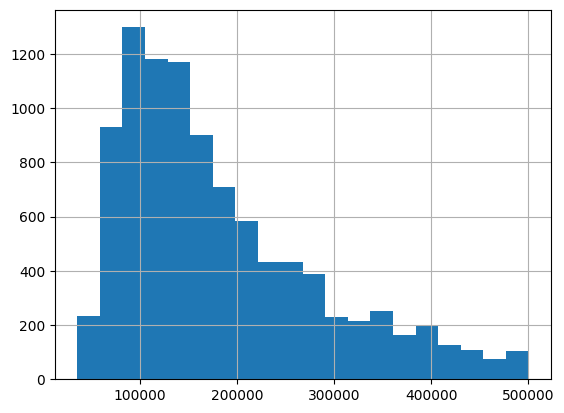

In [ ]:
df_cl.operation_amount.hist(bins=20)

###Equal Width Binning

Para este caso utilizaremos Equal Frequency Binning ya que es útil cuando deseas que cada clase tenga aproximadamente el mismo número de observaciones. Esto puede ser beneficioso para evitar clases desbalanceadas y que el modelo performe mejor.

Optamos por dividir los datos en 20 intervalos, lo que nos permite tener un ancho de aproximadamente U$S 20,000 por bin. Aunque este enfoque no es óptimo, consideramos que este rango es relativamente aceptable para obtener una estimación aproximada del precio de las propiedades.

In [ ]:
# Definir la función para Equal Width Binning
def equal_width_binning(data, num_bins):
    min_val = data.min()
    max_val = data.max()
    bin_width = (max_val - min_val) / num_bins
    bins = np.arange(min_val, max_val + bin_width, bin_width)
    bin_labels = range(1, num_bins + 1)
    binned_data = pd.cut(data, bins=bins, labels=bin_labels, include_lowest=True)
    return binned_data

# Aplicar la función a los datos
num_bins = 20  # Dividir en 3 bins
df_cl['binned_values'] = equal_width_binning(df_cl['operation_amount'], num_bins)

In [ ]:
print(df_cl[df_cl['binned_values'] == 1].operation_amount.min())
print(df_cl[df_cl['binned_values'] == 1].operation_amount.max())

36000.0
59000.0


In [ ]:
df_cl.head()

,operation_amount,expenses_amount,total_mts,covered_mts,rooms,bedrooms,bathrooms,garages,antique,latitude,longitude,antique_A estrenar,antique_En construcción,COMUNA_10,COMUNA_11,COMUNA_12,COMUNA_13,COMUNA_14,COMUNA_15,COMUNA_2,COMUNA_3,COMUNA_4,COMUNA_5,COMUNA_6,COMUNA_7,COMUNA_8,COMUNA_9,COMUNA_OTRO,building_layout_Frente,building_layout_Interno,building_layout_Lateral,real_estate_type_Casa,real_estate_type_PH,orientation_N,orientation_NE,orientation_NO,orientation_O,orientation_S,orientation_SE,orientation_SO,orientation_desconocido,binned_values
0,"158,000.00",37.57,55.00,55.00,3.00,2.00,1.00,0.00,50.00,-34.56,-58.46,False,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,False,False,False,True,False,False,False,False,False,False,6
1,"185,000.00",81.71,84.00,84.00,4.00,3.00,1.00,0.00,50.00,-34.59,-58.40,False,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,True,7
2,"120,000.00",0.00,100.00,70.00,3.00,2.00,1.00,0.00,12.00,-34.64,-58.43,False,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,False,True,False,False,False,False,False,False,False,True,4
3,"237,000.00",0.09,136.00,136.00,4.00,3.00,3.00,0.00,0.00,-34.60,-58.45,True,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,False,True,False,False,False,True,False,False,False,False,9
4,"205,000.00",11.27,160.00,80.00,3.00,1.00,2.00,1.00,6.00,-34.64,-58.46,False,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,False,False,False,False,False,False,True,False,False,False,8


###Generación de X e y

In [ ]:
# features = list(df_rl.columns) - ['operation_amount']
X = df_cl.drop(columns=['operation_amount','binned_values'])
y = df_cl[['binned_values']]

# Convertir etiquetas a valores numéricos
le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Modelo

####Decision Tree

In [ ]:
# Definir el modelo y los hiperparámetros para GridSearch
clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar y ejecutar GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='precision')
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y evaluar el rendimiento del modelo
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


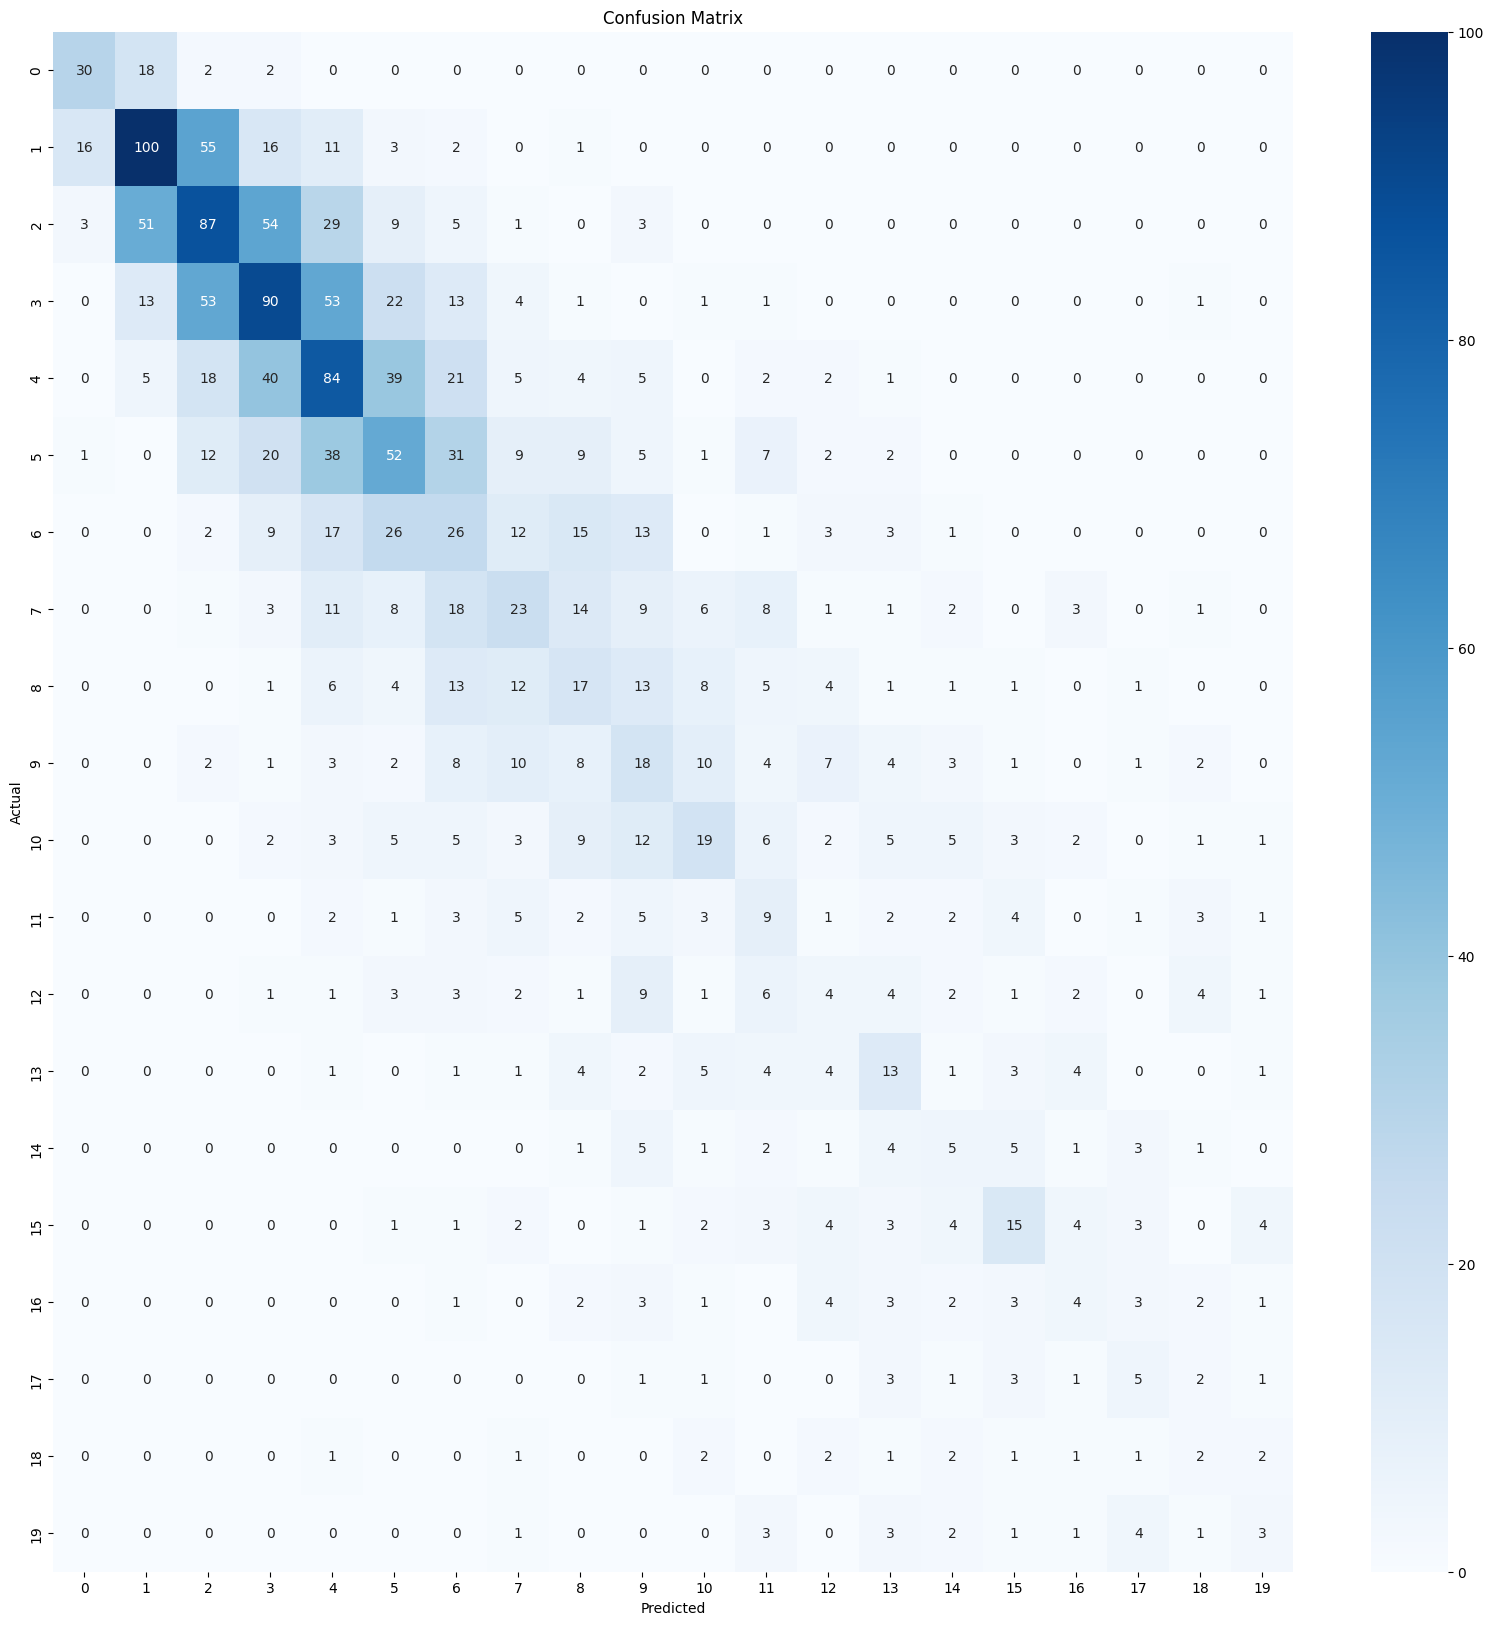

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.58      0.59        52
           1       0.53      0.49      0.51       204
           2       0.38      0.36      0.37       242
           3       0.38      0.36      0.37       252
           4       0.32      0.37      0.35       226
           5       0.30      0.28      0.29       189
           6       0.17      0.20      0.19       128
           7       0.25      0.21      0.23       109
           8       0.19      0.20      0.19        87
           9       0.17      0.21      0.19        84
          10       0.31      0.23      0.26        83
          11       0.15      0.20      0.17        44
          12       0.10      0.09      0.09        45
          13       0.25      0.30      0.27        44
          14       0.15      0.17      0.16        29
          15       0.37      0.32      0.34        47
          16       0.17      0.14      0.15        29
          17       0.23    

####Random Forest

In [ ]:
clf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators':[100],
    'max_features': ['auto'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Precision: {accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Precision: 0.37236774524910116


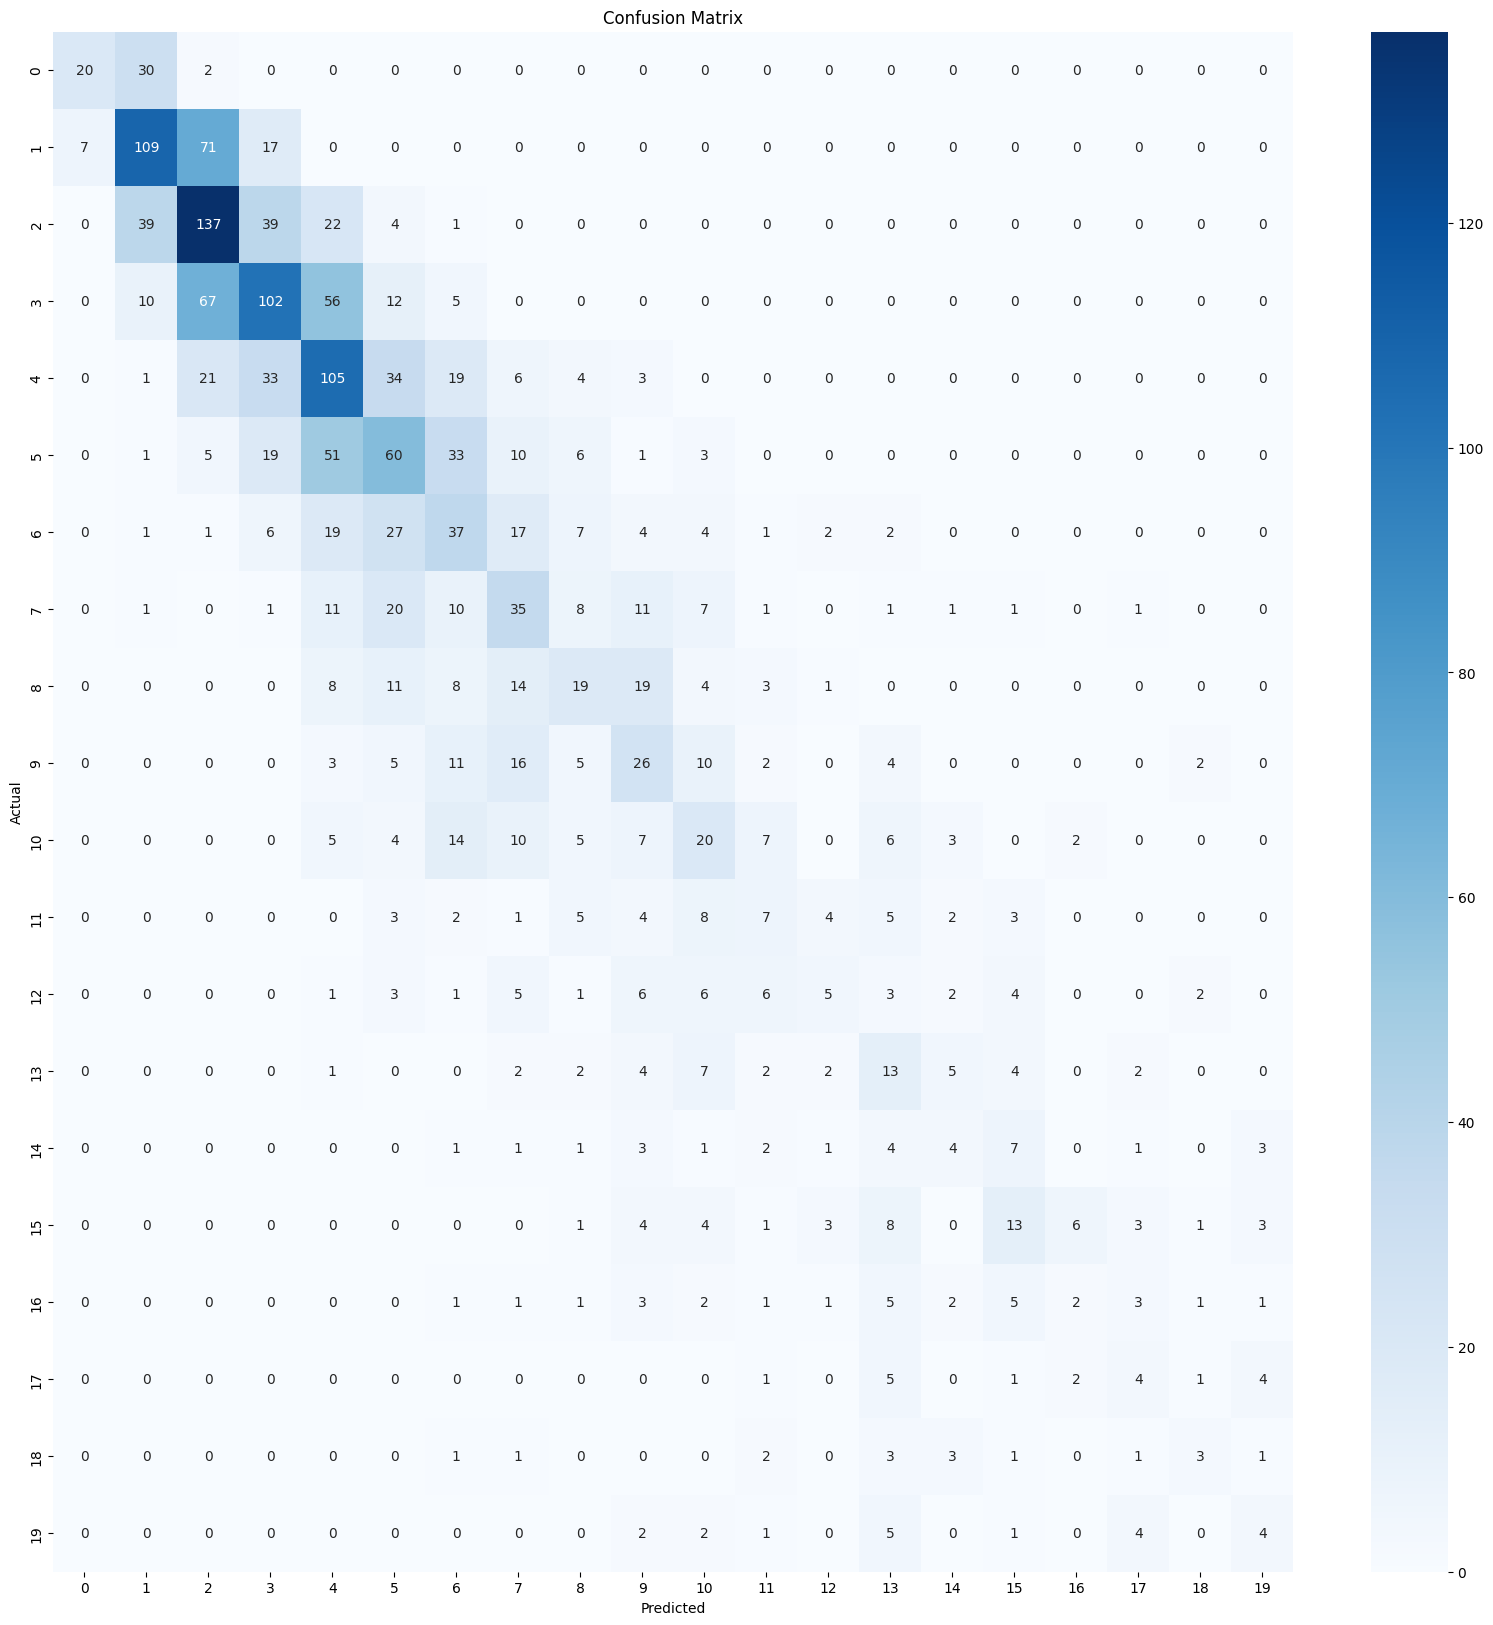

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.38      0.51        52
           1       0.57      0.53      0.55       204
           2       0.45      0.57      0.50       242
           3       0.47      0.40      0.43       252
           4       0.37      0.46      0.41       226
           5       0.33      0.32      0.32       189
           6       0.26      0.29      0.27       128
           7       0.29      0.32      0.31       109
           8       0.29      0.22      0.25        87
           9       0.27      0.31      0.29        84
          10       0.26      0.24      0.25        83
          11       0.19      0.16      0.17        44
          12       0.26      0.11      0.16        45
          13       0.20      0.30      0.24        44
          14       0.18      0.14      0.16        29
          15       0.33      0.28      0.30        47
          16       0.17      0.07      0.10        29
          17       0.21    

###Conclusiones

1. **Modelos de clasificación:**
   - Probamos tanto con modelos de Decision Tree como con Random Forest. Aunque la diferencia no es muy grande, observamos que el modelo de Random Forest tiene un mejor rendimiento.
2. **Impacto de la Clasificación en Problemas de Regresión**:
   - Al abordar un problema que típicamente se resuelve con modelos de regresión utilizando un enfoque de clasificación, los errores pequeños se ponderan de la misma manera que los errores grandes. Esto afecta drásticamente las métricas de desempeño, ya que no se diferencian las magnitudes de los errores.

3. **Pruebas con Diferentes Técnicas de Binarización**:
   - Realizamos pruebas utilizando diversas técnicas de binarización. Aunque el promedio de accuracy fue relativamente bajo, la dispersión en los resultados predichos se mantuvo dentro de un rango de +/- 3 bines aproximadamente. Esto indica que, aunque la precisión en términos de clases exactas es baja, las predicciones están cerca del rango correcto.

4. **Comparación con XGBoost**:
   - Considerando los resultados obtenidos con XGBoost y tomando en cuenta el error de +/- 3 bines, encontramos que los resultados son bastante similares. Esto sugiere que, aunque el modelo de clasificación no es perfecto en términos de precisión exacta, su rendimiento es comparable al del modelo de XGBoost cuando se permite un margen de error.

